<a href="https://colab.research.google.com/github/pronsSec/Prons_Sec-Does-Passwords/blob/main/PronsSecDoesPasswords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



---



---



---



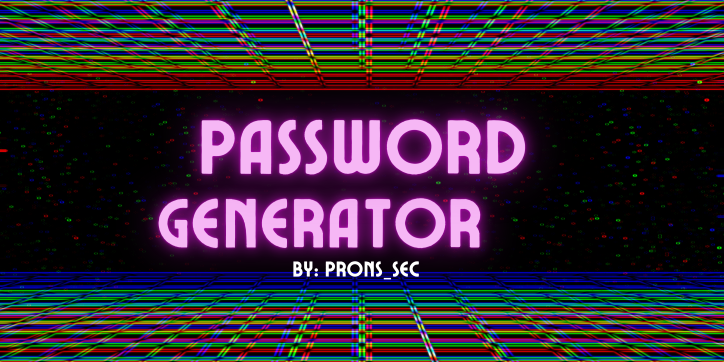

**If You Only Need To Decrypt:**

 You Can Run Just The Block Below And Skip To The Decrypt Blocks.



---



---



---



---



---








In [ ]:
#@title Run This First To Initiate The Crypto { display-mode: "form" }
#@markdown ---

from google.colab import files
import IPython
import time
import random
!pip install cryptography
from cryptography.fernet import Fernet
from IPython.display import clear_output



clear_output()
class Encryptor():

    def key_create(self):
        key = Fernet.generate_key()
        return key

    def key_write(self, key, key_name):
        with open(key_name, 'wb') as mykey:
            mykey.write(key)

    def key_load(self, key_name):
        with open(key_name, 'rb') as mykey:
            key = mykey.read()
        return key


    def file_encrypt(self, key, original_file, encrypted_file):
        
        f = Fernet(key)

        with open(original_file, 'rb') as file:
            original = file.read()

        encrypted = f.encrypt(original)

        with open (encrypted_file, 'wb') as file:
            file.write(encrypted)

    def file_decrypt(self, key, encrypted_file, decrypted_file):
        
        f = Fernet(key)

        with open(encrypted_file, 'rb') as file:
            encrypted = file.read()

        decrypted = f.decrypt(encrypted)

        with open(decrypted_file, 'wb') as file:
            file.write(decrypted)



---



---



---



In [ ]:
#@title This will make you a new password. { display-mode: "form" }

#@title Initialize the Encryption Stuff Plz
#@markdown Then Decrypt or Encrypt as Needed



low="abcdefghijklmnopqrstuvwxyz"
upp="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
num="0123456789"
sym="!@#$%^&*"
#obsc= ":?/>.<,\|{][}~`"
all=low+upp+num+sym
length = 64 #@param {type:"slider", min:8, max:64, step:1}
password="".join(random.sample(all,length))
print('-'*45)
print('-'*45)
print('-'*45)
print('|||Copy The Text|||')
print('-'*45)
print('-'*45)
print('-'*45)
print(password)
print('-'*45)
print('-'*45)
print('-'*45)
print('|||Download Below if YOu Would Like|||')
print('-'*45)
print('||||||The Download Will Be Encrypted||||||')
print('-'*45)
print('|||||||||Save Your Keys and The PW File|||||||||')
print('-'*45)
print('-'*45)
print('-'*45)




---



---



---



---



---



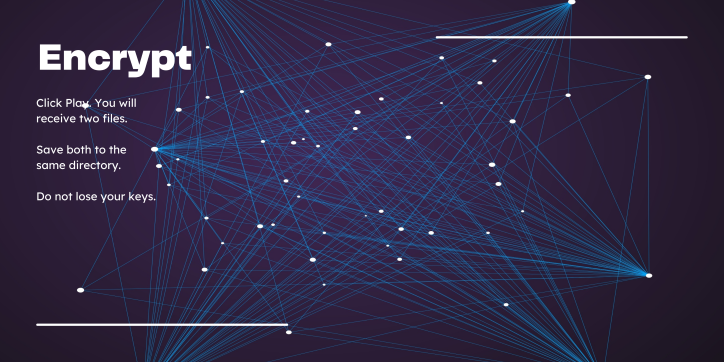

In [ ]:
#@title Click Here To Download Your Encrypted PW and Key { display-mode: "form" }
#@markdown ---

from google.colab import files

with open('notpw.txt', 'w') as f:
  
  f.write(password)

encryptor=Encryptor()

mykey=encryptor.key_create()

encryptor.key_write(mykey, 'mykey.key')

loaded_key=encryptor.key_load('mykey.key')

encryptor.file_encrypt(loaded_key, 'notpw.txt', 'enc_notpw.txt')

files.download('enc_notpw.txt')
files.download('mykey.key')



---


---



---




---



---





---



---



---



---



---



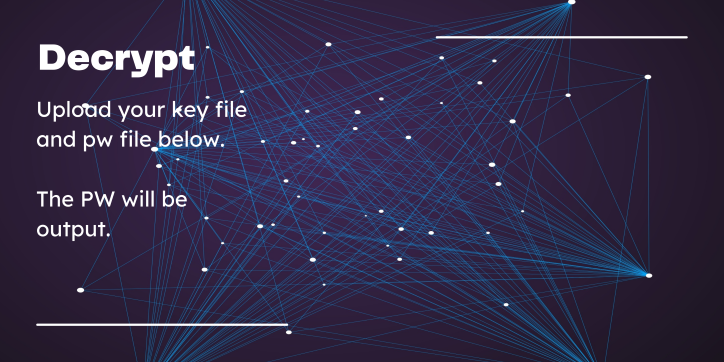

In [ ]:
#@markdown ---
#@title Upload Your Password File and Your Key File { display-mode: "form" }
#@markdown In that order plz...don't forget to run the first block above to initiate crypto.
def dahcrypt():
  filenames = []
  
  
  
  print('Upload Key File')
  uploaded1 = files.upload()
  clear_output()
  
  
  for fn in uploaded1.keys():
    print('User uploaded file "{name1}" with length {length} bytes'.format(
        name1=fn, length=len(uploaded1[fn])))
    filenames.append(fn)
  time.sleep(3)
  clear_output()
  
  
  print('Upload PW File')
  uploaded2 = files.upload()
  clear_output()
  for fn2 in uploaded2.keys():
    print('User uploaded file "{name2}" with length {length} bytes'.format(
       name2=fn2, length=len(uploaded2[fn2])))
    filenames.append(fn2)
  time.sleep(3)
  clear_output()
  
  
  
  #decryptor init 
  encryptor=Encryptor()
  #key_file_name = 'mykey.key' #@param {type: 'string'}
  loaded_key=encryptor.key_load(filenames[0]) 
  #@markdown ---
  #PW_file_name = 'enc_notpw.txt' #@param {type: 'string'}
  #@markdown ---
  encryptor.file_decrypt(loaded_key, filenames[1], 'dec_notpw.txt')
  with open('dec_notpw.txt', 'r') as i:
    print('-'*45)
    print('Your Password Is Below:')
    print('-'*45)
    print(i.read())
    print('-'*45)

dahcrypt()



---



---



---



---



---

